**Import all required Dependencies**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt 

**Download dataset directly from kaggle**

In [9]:
import os
os.environ['KAGGLE_USERNAME']='YOUR_KAGGLE_USERNAME'
os.environ['KAGGLE_KEY']='YOUR_KAGGLE_KEY'

In [10]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 96% 198M/207M [00:01<00:00, 127MB/s]
100% 207M/207M [00:01<00:00, 116MB/s]


In [11]:
!unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [23]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,"Train")
test_dir = os.path.join(main_dir,"Test")
valid_dir = os.path.join(main_dir,"Validation")

train_mask_dir = os.path.join(train_dir,"Mask")
train_nomask_dir = os.path.join(train_dir,"Non Mask")

In [18]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])


['0669.jpg', '0862.jpg', '1554.jpg', '0420.jpeg', '1117.jpg', '1492.jpg', '0972.jpg', '0112.png', '1173.jpg', '1555.jpg']
['251.jpg', '122.jpg', '285.jpg', '59.jpg', '22.jpg', '140.jpg', '81.jpg', '327.jpg', '194.jpg', '321.jpg']


**Image Visualization**

['/content/New Masks Dataset/Train/Mask/0669.jpg', '/content/New Masks Dataset/Train/Mask/0862.jpg', '/content/New Masks Dataset/Train/Mask/1554.jpg', '/content/New Masks Dataset/Train/Mask/0420.jpeg', '/content/New Masks Dataset/Train/Mask/1117.jpg', '/content/New Masks Dataset/Train/Mask/1492.jpg', '/content/New Masks Dataset/Train/Mask/0972.jpg', '/content/New Masks Dataset/Train/Mask/0112.png']
['/content/New Masks Dataset/Train/Non Mask/251.jpg', '/content/New Masks Dataset/Train/Non Mask/122.jpg', '/content/New Masks Dataset/Train/Non Mask/285.jpg', '/content/New Masks Dataset/Train/Non Mask/59.jpg', '/content/New Masks Dataset/Train/Non Mask/22.jpg', '/content/New Masks Dataset/Train/Non Mask/140.jpg', '/content/New Masks Dataset/Train/Non Mask/81.jpg', '/content/New Masks Dataset/Train/Non Mask/327.jpg']
Mask/0669.jpg
Mask/0862.jpg
Mask/1554.jpg
Mask/0420.jpeg
Mask/1117.jpg
Mask/1492.jpg
Mask/0972.jpg
Mask/0112.png
Non Mask/251.jpg
Non Mask/122.jpg
Non Mask/285.jpg
Non Mask/59.

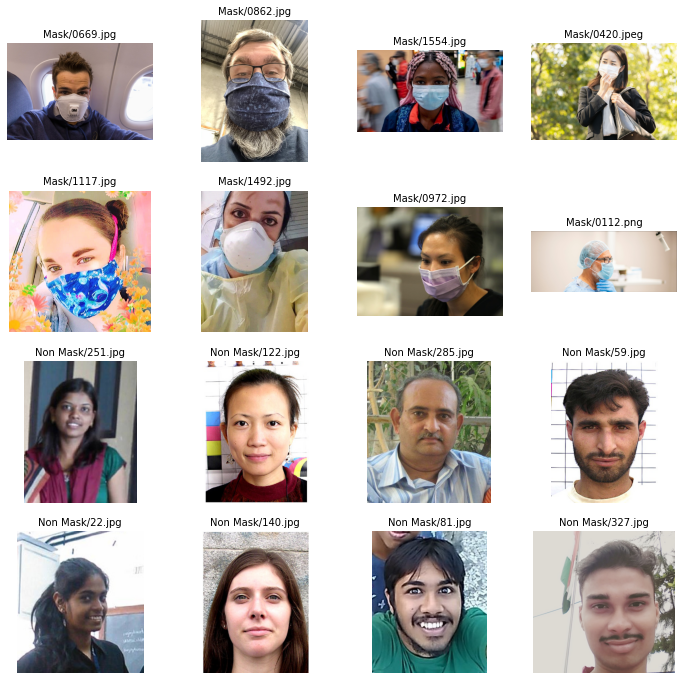

In [20]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))
nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic + nomask_pic

for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  print(data)
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()


**Data Augementation**

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,rotation_range=40,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                     target_size=(150,150),
                                                     batch_size = 32,
                                                     class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                     target_size=(150,150),
                                                     batch_size = 32,
                                                     class_mode='binary')

valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                     target_size=(150,150),
                                                     batch_size = 32,
                                                     class_mode='binary')




Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [25]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [26]:
train_generator.image_shape

(150, 150, 3)

**Build Convolution Neutral Network Model**

In [29]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)            

In [30]:
 model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
 

In [31]:
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=valid_generator)

Epoch 1/30
19/19 [==============================] - 35s 2s/step - loss: 3.2371 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5294
Epoch 2/30
19/19 [==============================] - 35s 2s/step - loss: 0.6550 - accuracy: 0.6183 - val_loss: 0.6581 - val_accuracy: 0.6209
Epoch 3/30
19/19 [==============================] - 35s 2s/step - loss: 0.4600 - accuracy: 0.8033 - val_loss: 0.4392 - val_accuracy: 0.8464
Epoch 4/30
19/19 [==============================] - 35s 2s/step - loss: 0.3306 - accuracy: 0.8867 - val_loss: 0.3651 - val_accuracy: 0.9020
Epoch 5/30
19/19 [==============================] - 35s 2s/step - loss: 0.2732 - accuracy: 0.9033 - val_loss: 0.3541 - val_accuracy: 0.8791
Epoch 6/30
19/19 [==============================] - 35s 2s/step - loss: 0.2559 - accuracy: 0.9083 - val_loss: 0.3286 - val_accuracy: 0.9183
Epoch 7/30
19/19 [==============================] - 35s 2s/step - loss: 0.2577 - accuracy: 0.9067 - val_loss: 0.3506 - val_accuracy: 0.8693
Epoch 8/30
19/19 [==

**Performance Evaluation and Test Model**

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

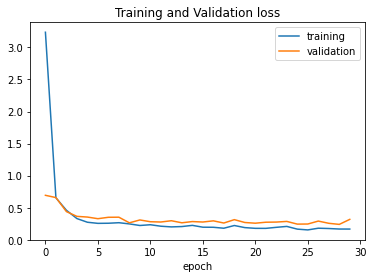

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

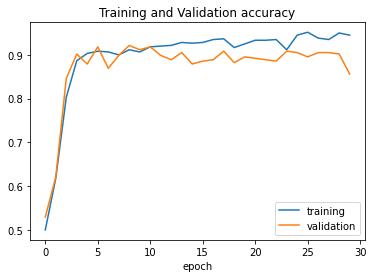

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [38]:
test_loss,test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 322ms/step - loss: 0.2506 - accuracy: 0.8900
test loss:0.25062620639801025 test acc:0.8899999856948853


In [33]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction ==0:
    print('mask')
  else:
    print('Not wearing Mask')

Saving mask.jpg to mask.jpg
Saving jason.jpg to jason (1).jpg
mask.jpg
mask
jason.jpg
Not wearing Mask


In [34]:
model.save('model.h5')